In [ ]:
import os

# Walk through directory

for dirpath,dirnames,filenames in os.walk("drive/MyDrive/Tomato_disease/Data/tomato"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")


There are 3 directories and 0 images in 'drive/MyDrive/Tomato_disease/Data/tomato'
There are 10 directories and 0 images in 'drive/MyDrive/Tomato_disease/Data/tomato/train'
There are 0 directories and 1000 images in 'drive/MyDrive/Tomato_disease/Data/tomato/train/Tomato___Bacterial_spot'
There are 0 directories and 1000 images in 'drive/MyDrive/Tomato_disease/Data/tomato/train/Tomato___Early_blight'
There are 0 directories and 1000 images in 'drive/MyDrive/Tomato_disease/Data/tomato/train/Tomato___Late_blight'
There are 0 directories and 1000 images in 'drive/MyDrive/Tomato_disease/Data/tomato/train/Tomato___Leaf_Mold'
There are 0 directories and 1000 images in 'drive/MyDrive/Tomato_disease/Data/tomato/train/Tomato___Septoria_leaf_spot'
There are 0 directories and 1000 images in 'drive/MyDrive/Tomato_disease/Data/tomato/train/Tomato___Spider_mites Two-spotted_spider_mite'
There are 0 directories and 1000 images in 'drive/MyDrive/Tomato_disease/Data/tomato/train/Tomato___Target_Spot'
Th

In [ ]:
# Get the classnames
import pathlib
import numpy as np

data_dir=pathlib.Path("drive/MyDrive/Tomato_disease/Data/tomato/train")
data_dir

PosixPath('drive/MyDrive/Tomato_disease/Data/tomato/train')

In [ ]:
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['Tomato___Bacterial_spot', 'Tomato___Early_blight',
       'Tomato___Late_blight', 'Tomato___Leaf_Mold',
       'Tomato___Septoria_leaf_spot',
       'Tomato___Spider_mites Two-spotted_spider_mite',
       'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
       'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'], dtype='<U45')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_randomly_image(target_dir,target_class):
  target_folder= target_dir + target_class
  print(target_folder)

  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)

  img=mpimg.imread(target_folder + "/" +random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

In [ ]:
class_names

array(['Tomato___Bacterial_spot', 'Tomato___Early_blight',
       'Tomato___Late_blight', 'Tomato___Leaf_Mold',
       'Tomato___Septoria_leaf_spot',
       'Tomato___Spider_mites Two-spotted_spider_mite',
       'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
       'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'], dtype='<U45')

drive/MyDrive/Tomato_disease/Data/tomato/train/Tomato___Bacterial_spot
['f04fd2e9-8aef-423f-8c47-42e179092bad___GCREC_Bact.Sp 3679.JPG']
Image shape: (256, 256, 3)


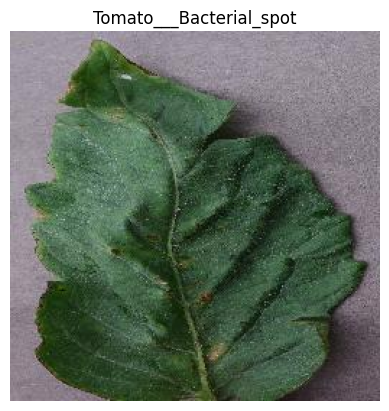

In [ ]:
# Lets view randomly images
img=view_randomly_image(target_dir="drive/MyDrive/Tomato_disease/Data/tomato/train/",
                        target_class="Tomato___Bacterial_spot")

drive/MyDrive/Tomato_disease/Data/tomato/train/Tomato___Spider_mites Two-spotted_spider_mite
['421b6662-c258-4c0d-b036-f42bf389c930___Com.G_SpM_FL 1763.JPG']
Image shape: (256, 256, 3)


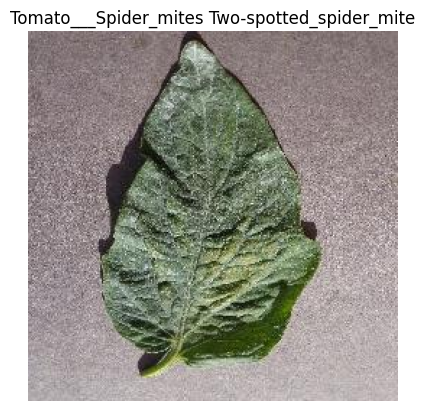

In [ ]:
# Lets view randomly images
img=view_randomly_image(target_dir="drive/MyDrive/Tomato_disease/Data/tomato/train/",
                        target_class="Tomato___Spider_mites Two-spotted_spider_mite")

array([[[139, 127, 129],
        [154, 142, 144],
        [120, 108, 110],
        ...,
        [131, 117, 117],
        [128, 114, 114],
        [127, 113, 113]],

       [[140, 128, 130],
        [139, 127, 129],
        [115, 103, 105],
        ...,
        [136, 122, 122],
        [135, 121, 121],
        [136, 122, 122]],

       [[139, 127, 129],
        [129, 117, 119],
        [129, 117, 119],
        ...,
        [136, 122, 122],
        [136, 122, 122],
        [139, 125, 125]],

       ...,

       [[175, 169, 171],
        [176, 170, 172],
        [179, 173, 175],
        ...,
        [194, 184, 185],
        [198, 188, 189],
        [203, 193, 194]],

       [[178, 172, 174],
        [178, 172, 174],
        [182, 176, 178],
        ...,
        [202, 192, 193],
        [193, 183, 184],
        [189, 179, 180]],

       [[176, 170, 172],
        [173, 167, 169],
        [176, 170, 172],
        ...,
        [192, 182, 183],
        [190, 180, 181],
        [199, 189, 190]]], dtype=uint8)
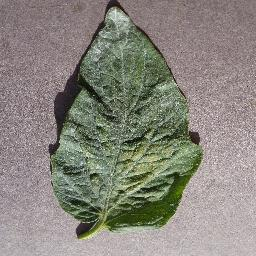

In [ ]:
img

In [ ]:
img.shape

(256, 256, 3)

## Load the data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.random.set_seed(42)

# Preprocess the data (i.e divide it by 255 so that pixel values between 0 and 1)

train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

#Paths
train_dir="drive/MyDrive/Tomato_disease/Data/tomato/train"
test_dir="drive/MyDrive/Tomato_disease/Data/tomato/val"

train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="categorical",
                                             seed=42)

valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="categorical",
                                             seed=42)

Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


## Model 1 CNN

In [ ]:
model_1=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation="softmax")
])

model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 10)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 10)        0

In [ ]:
history_1=model_1.fit(train_data,
                      epochs=10,
                      steps_per_epoch=int(0.25*len(train_data)),
                      validation_data=valid_data,
                      validation_steps=int(0.25*len(valid_data)))

Epoch 1/10
78/78 [==============================] - 276s 4s/step - loss: 0.9122 - accuracy: 0.6867 - val_loss: 1.0382 - val_accuracy: 0.6430
Epoch 2/10
78/78 [==============================] - 17s 212ms/step - loss: 0.8190 - accuracy: 0.7208 - val_loss: 0.9185 - val_accuracy: 0.6750
Epoch 3/10
78/78 [==============================] - 16s 207ms/step - loss: 0.7492 - accuracy: 0.7464 - val_loss: 0.8923 - val_accuracy: 0.6810
Epoch 4/10
78/78 [==============================] - 16s 209ms/step - loss: 0.7874 - accuracy: 0.7328 - val_loss: 0.8801 - val_accuracy: 0.7060
Epoch 5/10
78/78 [==============================] - 17s 217ms/step - loss: 0.6906 - accuracy: 0.7560 - val_loss: 0.8995 - val_accuracy: 0.7060
Epoch 6/10
78/78 [==============================] - 16s 210ms/step - loss: 0.6729 - accuracy: 0.7774 - val_loss: 0.7909 - val_accuracy: 0.7380
Epoch 7/10
78/78 [==============================] - 17s 219ms/step - loss: 0.5999 - accuracy: 0.7865 - val_loss: 0.8019 - val_accuracy: 0.7300
E

In [ ]:
model_1.evaluate(valid_data)

32/32 [==============================] - 5s 151ms/step - loss: 0.8616 - accuracy: 0.7240


[0.8616050481796265, 0.7239999771118164]

## Model 2 VGG16

In [ ]:
base_model=tf.keras.applications.VGG16(include_top=False)

base_model.trainable=False

inputs=tf.keras.layers.Input(shape=(224,224,3),
                             name="Input_layer")

x=base_model(inputs,training=False)

x=tf.keras.layers.GlobalAveragePooling2D(name="GAP2D")(x)

outputs=tf.keras.layers.Dense(10,activation="softmax",
                              name="Output")(x)

model_2=tf.keras.Model(inputs,outputs)

model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_2.fit(train_data,
            epochs=10,
            steps_per_epoch=int(0.25*len(train_data)),
            validation_data=valid_data,
            validation_steps=int(0.25*len(valid_data)))

Epoch 1/10
78/78 [==============================] - 25s 219ms/step - loss: 2.2341 - accuracy: 0.2420 - val_loss: 2.1174 - val_accuracy: 0.3867
Epoch 2/10
78/78 [==============================] - 15s 187ms/step - loss: 2.0368 - accuracy: 0.4455 - val_loss: 1.9696 - val_accuracy: 0.5078
Epoch 3/10
78/78 [==============================] - 16s 199ms/step - loss: 1.8857 - accuracy: 0.5437 - val_loss: 1.8341 - val_accuracy: 0.5781
Epoch 4/10
78/78 [==============================] - 15s 194ms/step - loss: 1.7794 - accuracy: 0.5705 - val_loss: 1.7963 - val_accuracy: 0.4570
Epoch 5/10
78/78 [==============================] - 15s 187ms/step - loss: 1.6715 - accuracy: 0.6094 - val_loss: 1.5854 - val_accuracy: 0.6367
Epoch 6/10
78/78 [==============================] - 19s 242ms/step - loss: 1.5815 - accuracy: 0.6306 - val_loss: 1.5689 - val_accuracy: 0.6328
Epoch 7/10
78/78 [==============================] - 16s 199ms/step - loss: 1.5083 - accuracy: 0.6484 - val_loss: 1.4943 - val_accuracy: 0.6133

In [ ]:
model_2.evaluate(valid_data)

32/32 [==============================] - 7s 222ms/step - loss: 1.3275 - accuracy: 0.6550


[1.3275032043457031, 0.6549999713897705]

## MobileNetV2

In [ ]:
base_model_m=tf.keras.applications.mobilenet_v2.MobileNetV2(include_top=False)

base_model_m.trainable=False

inputs=tf.keras.layers.Input(shape=(224,224,3),
                             name="Input_layer")

x=base_model_m(inputs,training=False)

x=tf.keras.layers.GlobalAveragePooling2D(name="GAP2D")(x)

outputs=tf.keras.layers.Dense(10,activation="softmax",
                              name="Output")(x)

model_mv2=tf.keras.Model(inputs,outputs)

model_mv2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_mv2.fit(train_data,
            epochs=10,
            steps_per_epoch=int(0.25*len(train_data)),
            validation_data=valid_data,
            validation_steps=int(0.25*len(valid_data)))

9406464/9406464 [==============================] - 1s 0us/step
Epoch 1/10
78/78 [==============================] - 19s 186ms/step - loss: 1.4155 - accuracy: 0.5421 - val_loss: 0.9012 - val_accuracy: 0.7305
Epoch 2/10
78/78 [==============================] - 15s 192ms/step - loss: 0.7935 - accuracy: 0.7616 - val_loss: 0.8265 - val_accuracy: 0.7617
Epoch 3/10
78/78 [==============================] - 15s 193ms/step - loss: 0.6280 - accuracy: 0.8149 - val_loss: 0.7319 - val_accuracy: 0.7695
Epoch 4/10
78/78 [==============================] - 16s 200ms/step - loss: 0.5360 - accuracy: 0.8409 - val_loss: 0.7178 - val_accuracy: 0.7852
Epoch 5/10
78/78 [==============================] - 15s 188ms/step - loss: 0.5047 - accuracy: 0.8474 - val_loss: 0.6458 - val_accuracy: 0.7969
Epoch 6/10
78/78 [==============================] - 15s 194ms/step - loss: 0.4483 - accuracy: 0.8674 - val_loss: 0.5293 - val_accuracy: 0.8398
Epoch 7/10
78/78 [==============================] - 15s 186ms/step - loss: 0.41

In [ ]:
model_mv2.evaluate(valid_data)

32/32 [==============================] - 7s 211ms/step - loss: 0.5061 - accuracy: 0.8460


[0.5060532093048096, 0.8460000157356262]

In [ ]:
for layer_number,layer in enumerate(base_model_m.layers):
  print(layer_number,layer.name)

0 input_6
1 Conv1
2 bn_Conv1
3 Conv1_relu
4 expanded_conv_depthwise
5 expanded_conv_depthwise_BN
6 expanded_conv_depthwise_relu
7 expanded_conv_project
8 expanded_conv_project_BN
9 block_1_expand
10 block_1_expand_BN
11 block_1_expand_relu
12 block_1_pad
13 block_1_depthwise
14 block_1_depthwise_BN
15 block_1_depthwise_relu
16 block_1_project
17 block_1_project_BN
18 block_2_expand
19 block_2_expand_BN
20 block_2_expand_relu
21 block_2_depthwise
22 block_2_depthwise_BN
23 block_2_depthwise_relu
24 block_2_project
25 block_2_project_BN
26 block_2_add
27 block_3_expand
28 block_3_expand_BN
29 block_3_expand_relu
30 block_3_pad
31 block_3_depthwise
32 block_3_depthwise_BN
33 block_3_depthwise_relu
34 block_3_project
35 block_3_project_BN
36 block_4_expand
37 block_4_expand_BN
38 block_4_expand_relu
39 block_4_depthwise
40 block_4_depthwise_BN
41 block_4_depthwise_relu
42 block_4_project
43 block_4_project_BN
44 block_4_add
45 block_5_expand
46 block_5_expand_BN
47 block_5_expand_relu
48 b

## Adding data augumentation

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

data_augumentation=keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2)
],name="data_augumentation")


In [ ]:
class_names

array(['Tomato___Bacterial_spot', 'Tomato___Early_blight',
       'Tomato___Late_blight', 'Tomato___Leaf_Mold',
       'Tomato___Septoria_leaf_spot',
       'Tomato___Spider_mites Two-spotted_spider_mite',
       'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
       'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'], dtype='<U45')

drive/MyDrive/Tomato_disease/Data/tomato/train/Tomato___Septoria_leaf_spot/3823a859-7570-4196-abf7-64f102d55f8d___Matt.S_CG 7740.JPG


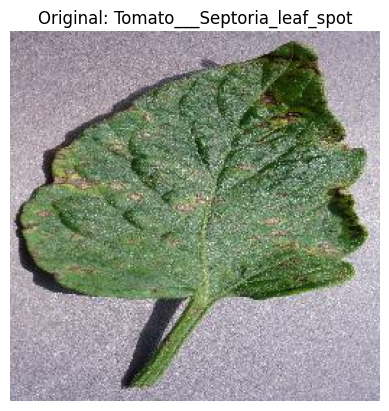

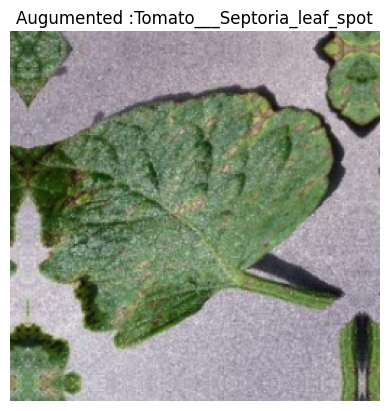

In [ ]:
# Visualize data augumentation
import PIL
target_class=random.choice(class_names)
target_dir="drive/MyDrive/Tomato_disease/Data/tomato/train/" + target_class

random_image=random.choice(os.listdir(target_dir))

random_image_path=target_dir + "/" + random_image

print(random_image_path)


img=mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original: {target_class}")
plt.axis(False);


augumented_image=data_augumentation(tf.expand_dims(img,axis=0))
plt.figure()
plt.imshow(tf.squeeze(augumented_image/255.))
plt.title(f"Augumented :{target_class}")
plt.axis(False);

## Feature Extraction and data augumentation

In [ ]:
base_model_3mv=tf.keras.applications.mobilenet_v2.MobileNetV2(include_top=False)

base_model_3mv.trainable=False

inputs=layers.Input(shape=(224,224,3),
                    name="Input")

x=data_augumentation(inputs)

x=base_model_3mv(x,training=False)

x=layers.GlobalAveragePooling2D(name="GAP2D")(x)

outputs=layers.Dense(10,activation="softmax",
                     name="output")(x)

model_mobile=keras.Model(inputs,outputs)

model_mobile.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

history_mv=model_mobile.fit(train_data,
                            epochs=10,
                            steps_per_epoch=int(0.25*len(train_data)),
                            validation_data=valid_data,
                            validation_steps=int(0.25*len(valid_data)))

Epoch 1/10
78/78 [==============================] - 18s 185ms/step - loss: 1.5892 - accuracy: 0.4860 - val_loss: 1.2102 - val_accuracy: 0.5820
Epoch 2/10
78/78 [==============================] - 15s 190ms/step - loss: 0.9375 - accuracy: 0.7129 - val_loss: 0.9857 - val_accuracy: 0.6523
Epoch 3/10
78/78 [==============================] - 15s 196ms/step - loss: 0.7873 - accuracy: 0.7528 - val_loss: 0.9508 - val_accuracy: 0.6562
Epoch 4/10
78/78 [==============================] - 14s 174ms/step - loss: 0.6720 - accuracy: 0.7893 - val_loss: 0.8771 - val_accuracy: 0.6953
Epoch 5/10
78/78 [==============================] - 14s 180ms/step - loss: 0.6228 - accuracy: 0.8125 - val_loss: 0.8242 - val_accuracy: 0.7305
Epoch 6/10
78/78 [==============================] - 14s 173ms/step - loss: 0.5745 - accuracy: 0.8149 - val_loss: 0.8783 - val_accuracy: 0.6875
Epoch 7/10
78/78 [==============================] - 14s 183ms/step - loss: 0.5558 - accuracy: 0.8213 - val_loss: 0.8415 - val_accuracy: 0.7305

In [ ]:
model_mobile.evaluate(valid_data)

32/32 [==============================] - 5s 149ms/step - loss: 0.7111 - accuracy: 0.7530


[0.7111344933509827, 0.753000020980835]

### Fine Tunning model_mobile

Note:Best is when first do feature extraction then fine tune it..

In [ ]:
model_mobile.layers

In [ ]:
# Are these layers trainable?
for layer in model_mobile.layers:
  print(layer,layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7a94d393f6d0> True
<keras.src.engine.sequential.Sequential object at 0x7a94d3b77c70> True
<keras.src.engine.functional.Functional object at 0x7a94daf28c70> False
<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7a94daf29270> True
<keras.src.layers.core.dense.Dense object at 0x7a94daf73df0> True


In [ ]:
base_model_3mv.trainable=True

# Unfreezing last 10 layers

for layer in base_model_3mv.layers[:-10]:
  layer.trainable=False

# Now recompile
model_mobile.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                     optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                     metrics=["accuracy"])

In [ ]:
# Fine Tune
fine_tune_epochs=20

history_fine_tune=model_mobile.fit(train_data,
                                   epochs=fine_tune_epochs,
                                   steps_per_epoch=int(0.25*len(train_data)),
                                   validation_data=valid_data,
                                   validation_steps=int(0.25*len(valid_data)))



Epoch 1/20
78/78 [==============================] - 14s 183ms/step - loss: 0.9684 - accuracy: 0.6518 - val_loss: 0.8728 - val_accuracy: 0.6836
Epoch 2/20
78/78 [==============================] - 14s 174ms/step - loss: 0.8088 - accuracy: 0.7228 - val_loss: 0.9151 - val_accuracy: 0.6719
Epoch 3/20
78/78 [==============================] - 15s 191ms/step - loss: 0.6719 - accuracy: 0.7645 - val_loss: 0.6871 - val_accuracy: 0.7422
Epoch 4/20
78/78 [==============================] - 14s 173ms/step - loss: 0.7071 - accuracy: 0.7569 - val_loss: 0.8540 - val_accuracy: 0.6992
Epoch 5/20
78/78 [==============================] - 14s 176ms/step - loss: 0.5880 - accuracy: 0.7921 - val_loss: 0.6770 - val_accuracy: 0.7383
Epoch 6/20
78/78 [==============================] - 15s 188ms/step - loss: 0.5898 - accuracy: 0.8000 - val_loss: 0.7083 - val_accuracy: 0.7461
Epoch 7/20
78/78 [==============================] - 17s 212ms/step - loss: 0.5141 - accuracy: 0.8290 - val_loss: 0.6520 - val_accuracy: 0.7852

In [ ]:
model_mobile.evaluate(valid_data)

32/32 [==============================] - 6s 177ms/step - loss: 0.9093 - accuracy: 0.7370


[0.9093324542045593, 0.7369999885559082]

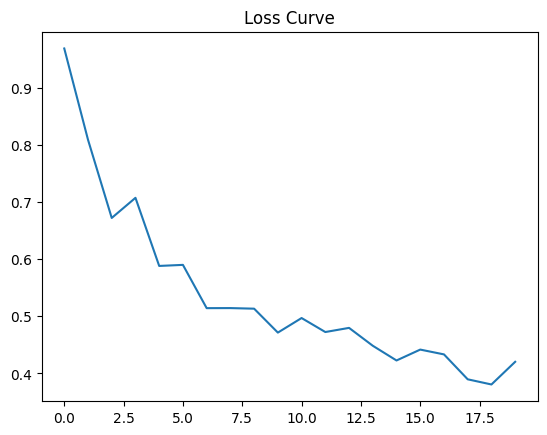

In [ ]:
plt.plot(history_fine_tune.history["loss"])
plt.title("Loss Curve")
plt.show()